## IMPORT PYTHON LIBRARIES(NUMPY,PANDAS,MATPLOTLIB)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## READING CSV FILE USING PANDAS

In [2]:
df=pd.read_csv('startup_funding.csv')
df1=df.copy()
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
2368,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
2369,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
2370,2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# FINDING TOTAL NUMBER OF FUNDINGS DONE EACH YEAR

## STEP 1: FIND ALL THE DATES IN WHICH FORMAT ISN'T CORRECT

In [3]:
df["StartupName"].unique()

array(['TouchKin', 'Ethinos', 'Leverage Edu', ..., 'Graphene',
       'Simplotel', 'couponmachine.in'], dtype=object)

In [4]:
df["InvestmentType"].unique()
df["InvestmentType"].value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
PrivateEquity        1
Crowd Funding        1
Debt Funding         1
Crowd funding        1
Name: InvestmentType, dtype: int64

In [5]:
def count_date_proper(x):
    return(len(x.split('-')))
df[df['Date'].apply(count_date_proper) != 3]

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2103,2103,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN,NaN
2104,2104,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,� Chandrakant Gogri",Seed Funding,"20,00,000",NaN
2159,2159,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,"5,00,000",NaN
2339,2339,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,"6,50,000",NaN
2357,2357,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"2,00,000",NaN


## STEP 2: BRING ALL THE DATES TO PROPER FORMAT

In [6]:
df['Date'].replace('12/05.2015','12-05-2015',inplace=True)
df['Date'].replace('13/04.2015','13-04-2015',inplace=True)
df['Date'].replace('15/01.2015','15-01-2015',inplace=True)
df['Date'].replace('22/01//2015','22-01-2015',inplace=True)

## STEP 3: EXTRACT YEAR FROM THE DATE COLUMN

In [7]:
df['Year']=pd.to_datetime(df['Date'],format="%d-%m-%Y").dt.year

In [8]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN,2017
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN,2017
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...
2367,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN,2015
2368,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund,2015
2369,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN,2015
2370,2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake",2015


## STEP 4: CECKING TO CONFIRM THAT DATA TYPE OF Year COLUMN IS int TO PERFORM FURTHER ANALYSIS

In [9]:
df['Year'].dtypes

dtype('int64')

## STEP 5: COUNTING THE NUMBER OF FUNDINGS EACH YEAR BY USING value_counts function

In [10]:
a=df["Year"].value_counts()
year=a.index
Number_of_Fundings=a.values

In [11]:
a

2016    993
2015    936
2017    443
Name: Year, dtype: int64

## STEP 6: CONVERTING IT INTO A LIST

In [12]:
lst = list(zip(year,Number_of_Fundings))

## STEP 7: CREATING A DATAFRAME WITH COLUMNS YEAR AND NUMBER OF FUNDINGS

In [13]:
df1=pd.DataFrame(lst,columns= ['Year','Number_of_Fundings'])
df1  

,Year,Number_of_Fundings
0,2016,993
1,2015,936
2,2017,443


## STEP 8: ANALYSIS USING LINE GRAPH TO SHOW NUMBER OF FUNDINGS FOR EACH YEAR

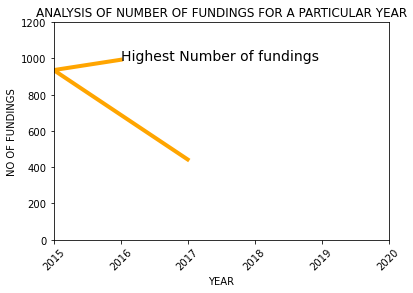

In [14]:
x=df1['Year']
y=df1['Number_of_Fundings']
plt.plot(x,y,linewidth=4,color="orange")
plt.axis([2015,2020,0,1200])
plt.xticks(rotation=45)
plt.text(2016,993,"Highest Number of fundings",fontsize=14)
plt.ylabel("NO OF FUNDINGS")
plt.xlabel("YEAR")
plt.title("ANALYSIS OF NUMBER OF FUNDINGS FOR A PARTICULAR YEAR")
plt.show()

In [15]:
df1.sort_values('Year',ascending=True)

,Year,Number_of_Fundings
1,2015,936
0,2016,993
2,2017,443


# FINDING TOP 10 INDIAN CITIES WHICH HAVE THE MOST NUMBER OF STARTUPS

## STEP 1: FINDING NO OF MISSING VALUES FOR EACH COLUMN

In [16]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
Year                   0
dtype: int64

## STEP 2: DROPPING REMARKS AND Sno COLUMN SINCE MOST OF THE VALUES IN REMARKS ARE NULL

In [17]:
df=df.drop(['Remarks','SNo'],axis=1)

In [18]:
df

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Year
0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",2017
1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,2017
2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,2017
3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",2017
4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",2017
...,...,...,...,...,...,...,...,...,...
2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",2015
2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",2015
2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",2015
2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,2015


## STEP 3: DROPPING ALL NULL VALUES

In [19]:
df.dropna(inplace=True,subset=["CityLocation"])

## STEP 4: FINDING UNIQUE CITIES SO AS TO CORRECT ERRORS

In [20]:
df['CityLocation'].unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'bangalore', 'Trivandrum',
       'Chennai', 'Chandigarh', 'Jaipur', 'Vadodara', 'Surat',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Indore', 'Singapore', 'Goa', 'Agra', 'Bangalore/ Bangkok',
       'Hubli', 'Delhi', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'SFO / Bangalore',
       'London', 'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi', 'Bhopal', 'New Delhi / US',
       'Mumbai / UK', 'Jodhpur', 'Hyderabad/USA', 'Boston',
       'Bangalore / Palo Alto', 'Mumbai / NY', 'USA/India',
       'Goa/Hyderabad', 'Noida / Singapore', 'Belgaum', 'Pune / US',
       'Chennai/ Singapore', 'Pune / Singapore', 'Bangalore / San Mateo',
       'New York/ India', 'US/India', 'Gurgaon / SFO', 'Bangalore / USA',
       'New Delhi/ Houston', 'Nagpur', 'Mumbai / Gl

## STEP 5: CHECKING FOR CASE SENSITIVE AND OTHER MISPLETS

In [21]:
df['CityLocation'].replace("bangalore", "Bangalore", inplace = True)
df['CityLocation'].replace("Delhi", "New Delhi", inplace = True)
df['CityLocation'].replace("SFO / Bangalor", "Bangalore", inplace = True)
df['CityLocation'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

## STEP 6: FUNCTION TO TAKE STARTUPS WHOSE LOCATION HAS NAME OF INDIAN CITIES IN THE STARTING

In [22]:
def ind_city(city):
    return city.split('/')[0].strip()

In [23]:
df['CityLocation'] = df['CityLocation'].apply(ind_city)

## STEP 7:FINALLY CHECKING UNIQUE VALUES IN CityLocation TO ENSURE EVERYTING IS FINE

In [24]:
df['CityLocation'].unique()

array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai',
       'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji',
       'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa',
       'Agra', 'Hubli', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'SFO', 'London',
       'Varanasi', 'Bhopal', 'Jodhpur', 'Boston', 'Belgaum', 'New York',
       'Nagpur', 'India', 'Udaipur', 'Dallas'], dtype=object)

## STEP 8: COUNTING NUMBER OF STARTUPS FOR EACH CITY

In [25]:
b=df["CityLocation"].value_counts()

In [26]:
b

Bangalore     636
Mumbai        449
New Delhi     389
Gurgaon       241
Pune           91
Noida          79
Hyderabad      77
Chennai        67
Ahmedabad      35
Jaipur         25
Kolkata        19
Chandigarh     10
Indore          9
Vadodara        9
Goa             8
Singapore       5
Kanpur          4
Coimbatore      3
USA             2
Kochi           2
Udupi           2
Siliguri        2
US              2
Bhopal          2
Gwalior         2
Agra            2
Trivandrum      2
Karur           1
Boston          1
Hubli           1
Panaji          1
Udaipur         1
New York        1
India           1
Surat           1
Kozhikode       1
Jodhpur         1
London          1
Nagpur          1
Dallas          1
Kerala          1
SFO             1
Belgaum         1
Varanasi        1
Lucknow         1
Missourie       1
Name: CityLocation, dtype: int64

## STEP 9: FINDING TOP 10 INDIAN CITIES IN TERMS OF STARTUP

In [27]:
b.head(10)

Bangalore    636
Mumbai       449
New Delhi    389
Gurgaon      241
Pune          91
Noida         79
Hyderabad     77
Chennai       67
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

## STEP 10: ANALYSING TOP 10 cities in terms of startup using a pie chart

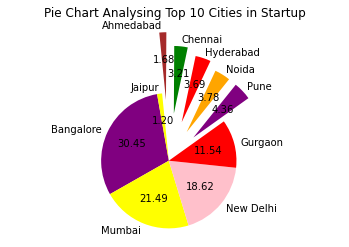

In [28]:
no_of_fundings=[636,449,389,241,91,79,77,67,35,25]
cities=["Bangalore","Mumbai","New Delhi","Gurgaon","Pune","Noida","Hyderabad","Chennai","Ahmedabad","Jaipur"]
colors=["purple","yellow","pink","red","purple","orange","red","green","brown","yellow"]
explode=[0,0,0,0,0.5,0.5,0.6,0.7,0.9,0]
plt.pie(no_of_fundings,colors=colors,labels=cities,autopct="%.2f",startangle=100,explode=explode)
plt.axis("equal")
plt.title("Pie Chart Analysing Top 10 Cities in Startup")
plt.show()

# FINDING TOP 10 CITIES WITH THE MOST AMOUNT OF FUNDINGS

In [29]:
df.isnull().sum()

Date                  0
StartupName           0
IndustryVertical      0
SubVertical         762
CityLocation          0
InvestorsName         8
InvestmentType        1
AmountInUSD         803
Year                  0
dtype: int64

## FINDING UNIQUE VALUES AND REPLACING ',' with '' to avoid problems in analysis

In [30]:
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',','')


In [31]:
df['AmountInUSD'].unique()

array(['1300000', nan, '500000', '850000', '1000000', '2600000',
       '20000000', '8500000', '12000000', '3000000', '2250000', '464000',
       '18500000', '540000', '1700000', '2000000', '4000000', '10000000',
       '600000', '700000', '200000', '1200000', '35000000', '25000000',
       '15000000', '1250000', '50000000', '650000', '232000', '1500000',
       '350000', '300000', '250000', '7800000', '776000', '5500000',
       '12300000', '100000', '12500000', '5200000', '2400000', '4500000',
       '215000', '31000000', '4600000', '5000000', '71000000', '311000',
       '21000000', '73700000', '390000', '104500000', '233000', '50000',
       '1400000', '7700000', '466000', '5300000', '1400000000',
       '30000000', '6600000', '580000', '8000000', '3500000', '80000000',
       '7000000', '3800000', '8200000', '40000000', '2700000', '6100000',
       '3690000', '18000000', '150000', '2300000', '2100000', '260000000',
       '310000', '175000', '620000', '4650000', '155000', '6300000

## FILLING THE MISSING VALUES

In [32]:
df["AmountInUSD"]=df['AmountInUSD'].fillna(0)

In [33]:
df["AmountInUSD"].dtype

dtype('O')

## CONVERTING AMOUNT TO FLOAT

In [34]:
df["AmountInUSD"]=pd.to_numeric(df["AmountInUSD"])

In [35]:
df["AmountInUSD"].dtype

dtype('int64')

## USING GROUP BY TO FIND SUM FOR A SPECIFIC CITY

In [36]:
a=df.groupby(["CityLocation"])["AmountInUSD"].sum()

In [37]:
a

CityLocation
Agra                   0
Ahmedabad       98186000
Bangalore     8422974108
Belgaum           500000
Bhopal           1900000
Boston           3000000
Chandigarh      26100000
Chennai        411105000
Coimbatore       1650000
Dallas           1000000
Goa              2380000
Gurgaon       2069021500
Gwalior           900000
Hubli                  0
Hyderabad      195362000
India           30000000
Indore           1672000
Jaipur          35560000
Jodhpur           160000
Kanpur            220000
Karur                  0
Kerala             27000
Kochi                  0
Kolkata         13865000
Kozhikode              0
London                 0
Lucknow          1000000
Missourie         350000
Mumbai        2354934500
Nagpur                 0
New Delhi     2818247500
New York         2950000
Noida          170638000
Panaji            825000
Pune           366653000
SFO              2700000
Siliguri               0
Singapore        3850000
Surat                  0
Trivandrum  

In [38]:
CityLocation=a.index

In [39]:
AmountInUSD=a.values

In [40]:
a

CityLocation
Agra                   0
Ahmedabad       98186000
Bangalore     8422974108
Belgaum           500000
Bhopal           1900000
Boston           3000000
Chandigarh      26100000
Chennai        411105000
Coimbatore       1650000
Dallas           1000000
Goa              2380000
Gurgaon       2069021500
Gwalior           900000
Hubli                  0
Hyderabad      195362000
India           30000000
Indore           1672000
Jaipur          35560000
Jodhpur           160000
Kanpur            220000
Karur                  0
Kerala             27000
Kochi                  0
Kolkata         13865000
Kozhikode              0
London                 0
Lucknow          1000000
Missourie         350000
Mumbai        2354934500
Nagpur                 0
New Delhi     2818247500
New York         2950000
Noida          170638000
Panaji            825000
Pune           366653000
SFO              2700000
Siliguri               0
Singapore        3850000
Surat                  0
Trivandrum  

In [41]:
CityLocation

Index(['Agra', 'Ahmedabad', 'Bangalore', 'Belgaum', 'Bhopal', 'Boston',
       'Chandigarh', 'Chennai', 'Coimbatore', 'Dallas', 'Goa', 'Gurgaon',
       'Gwalior', 'Hubli', 'Hyderabad', 'India', 'Indore', 'Jaipur', 'Jodhpur',
       'Kanpur', 'Karur', 'Kerala', 'Kochi', 'Kolkata', 'Kozhikode', 'London',
       'Lucknow', 'Missourie', 'Mumbai', 'Nagpur', 'New Delhi', 'New York',
       'Noida', 'Panaji', 'Pune', 'SFO', 'Siliguri', 'Singapore', 'Surat',
       'Trivandrum', 'US', 'USA', 'Udaipur', 'Udupi', 'Vadodara', 'Varanasi'],
      dtype='object', name='CityLocation')

In [42]:
AmountInUSD

array([         0,   98186000, 8422974108,     500000,    1900000,
          3000000,   26100000,  411105000,    1650000,    1000000,
          2380000, 2069021500,     900000,          0,  195362000,
         30000000,    1672000,   35560000,     160000,     220000,
                0,      27000,          0,   13865000,          0,
                0,    1000000,     350000, 2354934500,          0,
       2818247500,    2950000,  170638000,     825000,  366653000,
          2700000,          0,    3850000,          0,     100000,
          3000000,   16600000,          0,   12000000,    6040000,
            52000], dtype=int64)

In [43]:
lst_1=list(zip(CityLocation,AmountInUSD))

In [44]:
df2=pd.DataFrame(lst_1,columns=['CityLocation','AmountInUSD'])
df2

,CityLocation,AmountInUSD
0,Agra,0
1,Ahmedabad,98186000
2,Bangalore,8422974108
3,Belgaum,500000
4,Bhopal,1900000
5,Boston,3000000
6,Chandigarh,26100000
7,Chennai,411105000
8,Coimbatore,1650000
9,Dallas,1000000


In [45]:
df2=df2.sort_values('AmountInUSD',ascending=False)

In [46]:
df2

,CityLocation,AmountInUSD
2,Bangalore,8422974108
30,New Delhi,2818247500
28,Mumbai,2354934500
11,Gurgaon,2069021500
7,Chennai,411105000
34,Pune,366653000
14,Hyderabad,195362000
32,Noida,170638000
1,Ahmedabad,98186000
17,Jaipur,35560000


## FINDING TOP 10 CITIES WITH AMOUNT IN USD

In [47]:
df2=df2.reset_index()
df3=df2.head(10)
df3

,index,CityLocation,AmountInUSD
0,2,Bangalore,8422974108
1,30,New Delhi,2818247500
2,28,Mumbai,2354934500
3,11,Gurgaon,2069021500
4,7,Chennai,411105000
5,34,Pune,366653000
6,14,Hyderabad,195362000
7,32,Noida,170638000
8,1,Ahmedabad,98186000
9,17,Jaipur,35560000


In [48]:
amt=df2["AmountInUSD"].head(10)
amt=amt.values
amt

array([8422974108, 2818247500, 2354934500, 2069021500,  411105000,
        366653000,  195362000,  170638000,   98186000,   35560000],
      dtype=int64)

In [49]:
city=df2["CityLocation"].head(10)
city=city.values
city

array(['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Chennai', 'Pune',
       'Hyderabad', 'Noida', 'Ahmedabad', 'Jaipur'], dtype=object)

In [50]:
x=[]
y=[]
for i in range(10):
    x.append(amt[i])
    y.append(city[i])

## ANALYSIS OF TOP 10 CITIES AND AMOUNT FUNDED USING PIE CHART

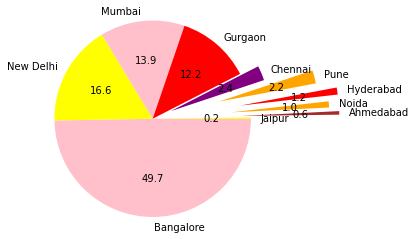

In [51]:
colors=["pink","yellow","pink","red","purple","orange","red","orange","brown","yellow"]
explode=[0,0,0,0,0.2,0.7,0.9,0.8,0.9,0]
plt.pie(x,colors=colors,labels=y,autopct="%.1f",startangle=360,explode=explode,counterclock=False)
plt.axis("equal")
plt.show()

## FINDING AMOUNT OF TOP 10 CITIES IN TERMS OF PERCENTAGE

In [52]:
perc=df3["AmountInUSD"]/df3["AmountInUSD"].sum()*100

In [53]:
perc

0    49.714528
1    16.634011
2    13.899420
3    12.211889
4     2.426446
5     2.164079
6     1.153076
7     1.007149
8     0.579519
9     0.209884
Name: AmountInUSD, dtype: float64

In [54]:
city

array(['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Chennai', 'Pune',
       'Hyderabad', 'Noida', 'Ahmedabad', 'Jaipur'], dtype=object)

In [55]:
lst_final=list(zip(city,perc))

In [56]:
df4=pd.DataFrame(lst_final,columns=['CityLocation','Percentage'])

In [57]:
df4

,CityLocation,Percentage
0,Bangalore,49.714528
1,New Delhi,16.634011
2,Mumbai,13.899420
3,Gurgaon,12.211889
4,Chennai,2.426446
5,Pune,2.164079
6,Hyderabad,1.153076
7,Noida,1.007149
8,Ahmedabad,0.579519
9,Jaipur,0.209884


In [58]:
df.isnull().sum()

Date                  0
StartupName           0
IndustryVertical      0
SubVertical         762
CityLocation          0
InvestorsName         8
InvestmentType        1
AmountInUSD           0
Year                  0
dtype: int64

In [59]:
df["InvestmentType"].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan],
      dtype=object)

In [60]:
df["InvestmentType"].value_counts()

Seed Funding      1211
Private Equity     980
Debt Funding         1
Name: InvestmentType, dtype: int64

In [61]:
df["InvestmentType"]=df["InvestmentType"].fillna("Seed Funding")

In [62]:
df["InvestmentType"].unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding'], dtype=object)

In [63]:
df["InvestmentType"].value_counts()

Seed Funding      1212
Private Equity     980
Debt Funding         1
Name: InvestmentType, dtype: int64

In [64]:
perc_1=df["InvestmentType"].value_counts()/df["InvestmentType"].value_counts().sum()*100

In [65]:
perc_1

Seed Funding      55.266758
Private Equity    44.687642
Debt Funding       0.045600
Name: InvestmentType, dtype: float64

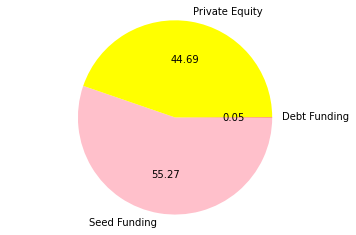

In [66]:
colors=["pink","yellow","red"]
explode=[0,0,0]
plt.pie(perc_1,colors=colors,labels=['Seed Funding','Private Equity','Debt Funding'],autopct="%.2f",startangle=360,explode=explode,counterclock=False)
plt.axis("equal")
plt.show()

In [67]:
df.isnull().sum()

Date                  0
StartupName           0
IndustryVertical      0
SubVertical         762
CityLocation          0
InvestorsName         8
InvestmentType        0
AmountInUSD           0
Year                  0
dtype: int64

In [68]:
df["IndustryVertical"].unique()

array(['Technology', 'Consumer Internet', 'eCommerce', 'Logistics',
       'Others', 'Healthcare', 'Food & Beverage', 'ECommerce', 'Finance',
       'Education', 'Food & Beverages', 'ecommerce', 'healthcare',
       'Real Estate', 'FMCG', 'Reality', 'Auto', 'Ecommerce', 'BFSI',
       'Consumer Interne', 'Online Education Information platform',
       'Brand Licensing Startup',
       'Gourmet Food Discovery & Delivery platform',
       'Transportation & Logistics Platform',
       'Enterprise Marketing Automation platform',
       'Health, Wellness & Beauty Services App', 'Digital Healthcare',
       'Last Minute Hotel Booking App', 'Womens Fashion Wear Portal',
       'Product Learning platform',
       'Online Food ordering & Delivery platform',
       'App based Bus Pooling Services', 'Social Learning Platform',
       'Social Fitness platform', 'On Demand Mobile app developer',
       'Car Maintenance & Management mobile app',
       'Online Wedding Marketplace', 'Splitting Bills 

In [69]:
df['IndustryVertical'].replace("eCommerce", "Ecommerce", inplace = True)
df['IndustryVertical'].replace("ecommerce", "Ecommerce", inplace = True)
df['IndustryVertical'].replace("ECommerce", "Ecommerce", inplace = True)

In [70]:
b=df.groupby(["IndustryVertical"])["AmountInUSD"].sum()

In [71]:
b

IndustryVertical
360-degree view creating platform                                 0
3D Printer Manufacturer                                     3000000
API Workflow platform                                       1000000
Activity Based Social Network                                     0
Advertising & Marketing Community Networking platform       1000000
                                                             ...   
proximity marketing & Mobile Advertising platform             80000
residential rental management platform                       640000
solar products and services marketplace                           0
virtual reality, 3d simulation and stereoscopic products     800000
visual search and discovery platform                        1000000
Name: AmountInUSD, Length: 737, dtype: int64

In [72]:
b.sort_values(ascending=False)

IndustryVertical
Ecommerce                            4281189608
Consumer Internet                    3797036500
Technology                           1103593500
Online Marketplace                    700000000
E-Commerce & M-Commerce platform      680000000
                                        ...    
Online Purchase rewards app                   0
Digital Media Platform                        0
Online Printing Services                      0
Digital Media publishing platform             0
360-degree view creating platform             0
Name: AmountInUSD, Length: 737, dtype: int64

In [73]:
IndustryType=b.index

In [74]:
Amount=b.values

In [75]:
b

IndustryVertical
360-degree view creating platform                                 0
3D Printer Manufacturer                                     3000000
API Workflow platform                                       1000000
Activity Based Social Network                                     0
Advertising & Marketing Community Networking platform       1000000
                                                             ...   
proximity marketing & Mobile Advertising platform             80000
residential rental management platform                       640000
solar products and services marketplace                           0
virtual reality, 3d simulation and stereoscopic products     800000
visual search and discovery platform                        1000000
Name: AmountInUSD, Length: 737, dtype: int64

In [76]:
lst_indus=list(zip(IndustryType,Amount))

In [77]:
df_indus=pd.DataFrame(lst_indus,columns=['IndustryType','Amount'])

In [78]:
df_indus

,IndustryType,Amount
0,360-degree view creating platform,0
1,3D Printer Manufacturer,3000000
2,API Workflow platform,1000000
3,Activity Based Social Network,0
4,Advertising & Marketing Community Networking p...,1000000
...,...,...
732,proximity marketing & Mobile Advertising platform,80000
733,residential rental management platform,640000
734,solar products and services marketplace,0
735,"virtual reality, 3d simulation and stereoscopi...",800000


In [79]:
df_indus=df_indus.sort_values('Amount',ascending=False)

In [80]:
df_indus

,IndustryType,Amount
155,Ecommerce,4281189608
95,Consumer Internet,3797036500
656,Technology,1103593500
476,Online Marketplace,700000000
146,E-Commerce & M-Commerce platform,680000000
...,...,...
492,Online Purchase rewards app,0
138,Digital Media Platform,0
489,Online Printing Services,0
139,Digital Media publishing platform,0


In [81]:
amt=df_indus['Amount'].head(5)
amt=amt.values
amt

array([4281189608, 3797036500, 1103593500,  700000000,  680000000],
      dtype=int64)

In [82]:
industry=df_indus['IndustryType'].head(5)
industry=industry.values
industry

array(['Ecommerce', 'Consumer Internet', 'Technology',
       'Online Marketplace', 'E-Commerce & M-Commerce platform'],
      dtype=object)

In [83]:
x=[]
y=[]
for i in range(5):
    x.append(amt[i])
    y.append(industry[i])
    

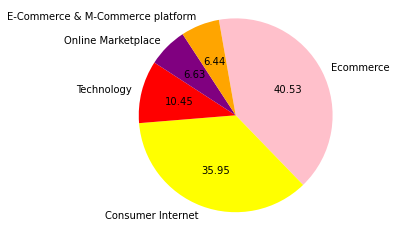

In [84]:
colors=["pink","yellow","red","purple","orange"]
explode=[0,0,0,0,0]
plt.pie(x,colors=colors,labels=y,autopct="%.2f",startangle=100,explode=explode,counterclock=False)
plt.axis("equal")
plt.show()

In [85]:
perc_indus=df_indus["Amount"]/df_indus["Amount"].sum()*100

In [86]:
perc_indus

155    25.072085
95     22.236722
656     6.463014
476     4.099435
146     3.982309
         ...    
492     0.000000
138     0.000000
489     0.000000
139     0.000000
0       0.000000
Name: Amount, Length: 737, dtype: float64

In [87]:
industry

array(['Ecommerce', 'Consumer Internet', 'Technology',
       'Online Marketplace', 'E-Commerce & M-Commerce platform'],
      dtype=object)

In [88]:
lst_final_indus=list(zip(industry,perc))

In [89]:
df_indus=pd.DataFrame(lst_final_indus,columns=['IndustryType','percentage'])

In [90]:
df_indus

,IndustryType,percentage
0,Ecommerce,49.714528
1,Consumer Internet,16.634011
2,Technology,13.899420
3,Online Marketplace,12.211889
4,E-Commerce & M-Commerce platform,2.426446


In [91]:
df.isnull().sum()

Date                  0
StartupName           0
IndustryVertical      0
SubVertical         762
CityLocation          0
InvestorsName         8
InvestmentType        0
AmountInUSD           0
Year                  0
dtype: int64

In [92]:
df["StartupName"].unique()

array(['TouchKin', 'Ethinos', 'Leverage Edu', ..., 'Dazo', 'Tradelab',
       'PiQube'], dtype=object)

In [93]:
df["StartupName"].value_counts()

Swiggy          7
UrbanClap       6
Jugnoo          5
Medinfi         5
NoBroker        4
               ..
HealthEnablr    1
RoomsTonite     1
Whoop           1
TruckMandi      1
Sportido        1
Name: StartupName, Length: 1872, dtype: int64